In this project we are going to predict the disease name with the help of symptoms. The dataset is collected from kaggle.
We are going to explore various algorithms and choose the best algorithm which can provide high accuracy.

In [37]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Explore and understand data

Import data and see what the data looks like.

In [2]:
data = pd.read_csv('Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
data.shape

(4920, 134)

In [4]:
len(data['prognosis'].unique())

41

The dataset contain 134 columns and 4920 entries. The data is categorical and is encoded already.
There are 41 unique values in the prognosis column(label)

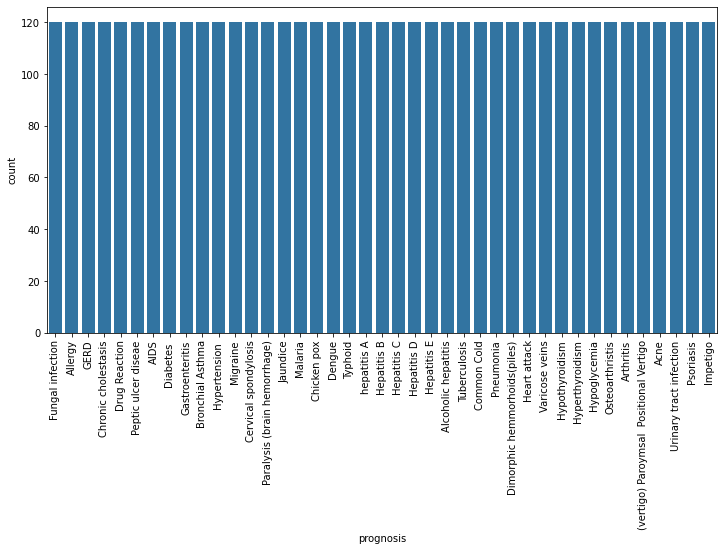

In [5]:
plt.figure(figsize=(12, 6))
base_color = sb.color_palette()[0]
sb.countplot(data=data, x='prognosis', color=base_color)
plt.xticks(rotation=90);

Function to find and drop null columns from the dataset

In [6]:
def drop_null_values(data):
    null_col = [col for col in data.columns if data[col].isnull().any()]
    data.drop(null_col, axis=1, inplace=True)
    return data

In [7]:
drop_null_values(data)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [8]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

convert all the data into 'category' type

In [9]:
data = data.astype('category')

In [10]:
data.dtypes

itching                 category
skin_rash               category
nodal_skin_eruptions    category
continuous_sneezing     category
shivering               category
                          ...   
inflammatory_nails      category
blister                 category
red_sore_around_nose    category
yellow_crust_ooze       category
prognosis               category
Length: 133, dtype: object

# Distribute data into training data and validation data

In [11]:
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [12]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: category
Categories (41, object): ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', ..., 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize classifier, train classifier and check their accuracy

In [15]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gaussian_nb = GaussianNB()
categorical_nb = CategoricalNB()
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
bagging = BaggingClassifier()
gradient_boosting = GradientBoostingClassifier()

classifiers = [dt, knn, gaussian_nb, categorical_nb, rf, adaboost, bagging, gradient_boosting]

def train_and_test():
    result = {}
    for clf in classifiers:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        score = accuracy_score(y_val, pred)
        result[clf.__class__.__name__] = score
    return result

In [16]:
result = train_and_test()

**As, we can see most of the classifiers give 100% result**

In [17]:
def plot_clf(result):
    plt.figure(figsize=(12,6))
    size = np.arange(0, 100+10, 10)
    sb.barplot(x = [v * 100 for v in result.values()] , y=[k for k in result.keys()])
    plt.xticks(size)
    plt.xlabel('Accuracy')
    plt.ylabel('Classifiers');

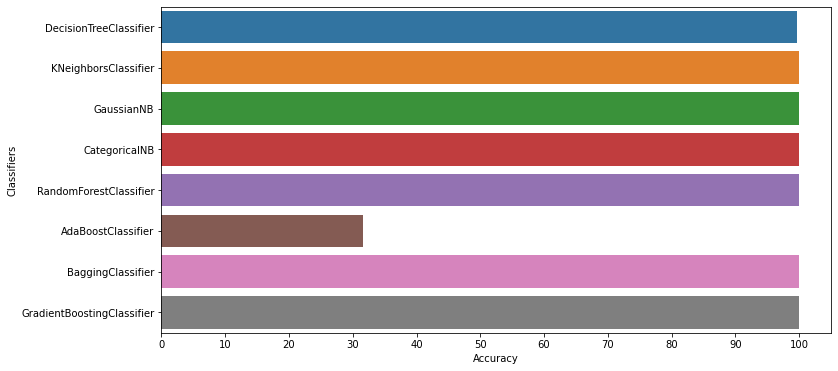

In [18]:
plot_clf(result)

# Test classfiers on Testing Data

In [19]:
test_data = pd.read_csv('Testing.csv')
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [20]:
test_X = test_data.drop('prognosis', axis=1)
test_y = test_data['prognosis']

In [24]:
def clf_report(clf):
    pred = clf.predict(test_X)
    score = classification_report(test_y, pred)
    return score

print(clf_report(categorical_nb))

**Most of the classifiers gives 100% result so we choose KNNClassifier as our model**

# Save trained model

In [39]:
filename = 'knn.model'
pickle.dump(knn, open(filename, 'wb'))